# Marco and Financial Economertics  Lab Problem Week2 
## Thomas Yang and Jianhua Mei

## Lab Problem 1: OLS Estimation

Simulate data that follows the simple linear regression model. The aim of this problem is to estimate the regression parameters and test the assumptions of OLS.


In [135]:
# Import
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Question 1 

### 1. Generate a vector of 500 observations from a standard normal distribution and assign it as the independent variable X.

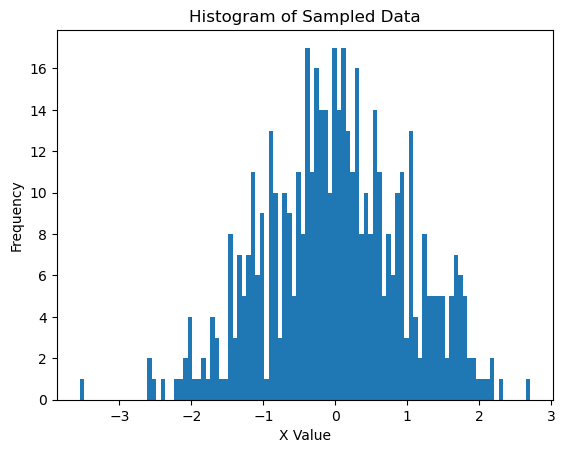

In [136]:
#np.random.seed(0)

# mean
mu = 0
# std    
sigma = 1 
# number of observations
obs = 500

# Generate normal distirbution sample
X = np.random.normal(loc=mu, scale=sigma, size=obs)

plt.figure()

# Histogram Plot
plt.hist(X, bins=100)

# Set label and title
plt.title("Histogram of Sampled Data")
plt.xlabel("X Value")
plt.ylabel("Frequency")

# Show Histogram 
plt.show()

### 2. Construct the dependent variable Y using the formula Y = 2 + 3X + ε, where ε is an error term composed of 500 observations drawn from a standard normal distribution

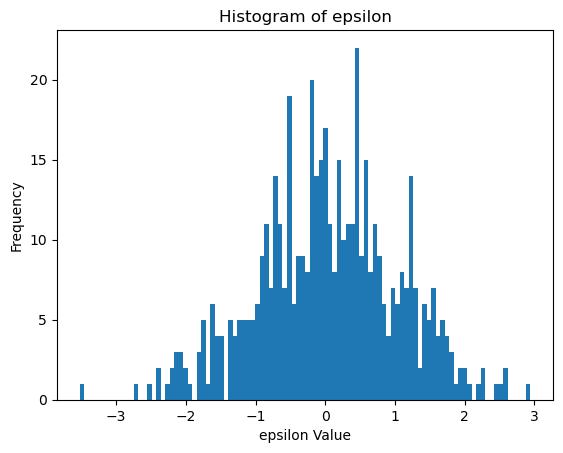

In [137]:
#np.random.seed(100)
# mean
mu = 0
# std    
sigma = 1 
# number of observations
#obs = 500

epsilon = np.random.normal(loc=mu, scale=sigma, size=obs)

# Figure
plt.figure(2)

# Histogram Plot
plt.hist(epsilon, bins=100)

# Set label and title
plt.title("Histogram of epsilon")
plt.xlabel("epsilon Value")
plt.ylabel("Frequency")

# Show Histogram 
plt.show()

In [138]:
# Method 1 for loop
Y1 = []
for i in range(len(X)):
    Y1_temp = 2 + 3 * X[i] + epsilon[i]
    Y1.append(Y1_temp)
Y1 = np.array(Y1)

# Method 2 vectorization
Y2 = 2 + 3 * X + epsilon

### Q3 Estimate the parameters of the regression model Y = beta_0 + beta_1 * X + epsilon using OLS.

In [139]:
Y = Y2
# add a constant term for the intercept
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     4246.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          6.78e-246
Time:                        00:26:04   Log-Likelihood:                -714.40
No. Observations:                 500   AIC:                             1433.
Df Residuals:                     498   BIC:                             1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0458      0.045     45.200      0.0

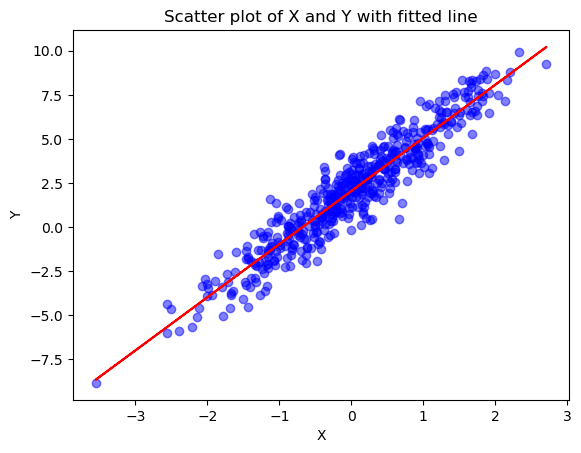

In [140]:
# Data plot
plt.scatter(X[:,1], Y, color='blue', alpha=0.5) 

# Prediciton
Y_pred = model.predict(X)  
plt.plot(X[:,1], Y_pred, color='red')  
# Scatter plot of X and Y with fitted line
plt.title('Scatter plot of X and Y with fitted line')
plt.xlabel('X')
plt.ylabel('Y')
# Show Plt
plt.show()

## Lab Problem 2: Heteroscedasticity and Robust Standard Errors 
### This problem introduces the concept of heteroscedasticity and how to handle it using robust standard errors.

### 1. Generate a vector of 500 observations from a standard normal distribution and assign it as the independent variable X.

In [141]:
# X
np.random.seed(8888)
# mean
mu = 0
# std    
sigma = 1 
# number of observations
obs = 500

# Generate normal distirbution sample
X = np.random.normal(loc=mu, scale=sigma, size=obs)

# epsilon
np.random.seed(2222)
# mean
mu = 0
# std    
sigma = 1 
# number of observations
#obs = 500

epsilon = np.random.normal(loc=mu, scale=sigma, size=obs)

### 2. Construct the dependent variable Y using the formula Y = 2+3X+Xε, where ε is an error term composed of 500 observations drawn from a standard normal distribution. Multiply each ε by X to induce heteroscedasticity.

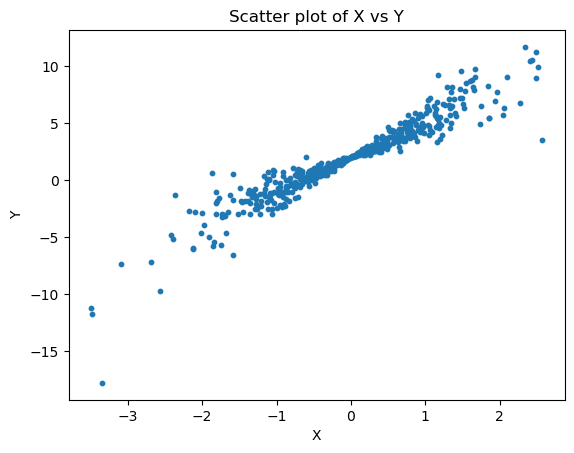

In [142]:
Y1 = []
for i in range(len(X)):
    epsilon_heteroskedastic = X[i] * epsilon[i]
    Y1.append(2 + 3* X[i] + epsilon_heteroskedastic)
Y1 = np.array(Y1)

epsilon_heteroskedastic = X * epsilon
Y2 = 2 + 3 * X + epsilon_heteroskedastic
Y3 = 2 + 3 * X + epsilon

plt.figure()
plt.scatter(X, Y2, s = 10)

# Scatter plot of X vs Y"
plt.title("Scatter plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")

# show
plt.show()

### Q3 Estimate the parameters of the regression model Y = beta_0 + beta_1 * X + epsilon using OLS.

In [143]:
Y = Y2
X = sm.add_constant(X) 
results = sm.OLS(Y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     4611.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          6.50e-254
Time:                        00:26:09   Log-Likelihood:                -732.82
No. Observations:                 500   AIC:                             1470.
Df Residuals:                     498   BIC:                             1478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0326      0.047     43.262      0.0

### 4. Run a Breusch-Pagan test to detect the presence of heteroscedasticity.

In [144]:
from statsmodels.stats.diagnostic import het_breuschpagan

#### In the case of Ordinary Least Squares (OLS) regression, if the model satisfies certain assumptions then the OLS estimator is the Best Linear Unbiased Estimator (BLUE). This means that among all linear unbiased estimators, OLS has the smallest variance, and thus is "efficient". However, if the model violates these assumptions, such as when there is heteroscedasticity, the OLS estimator may no longer be efficient. 

#### If the test statistic has a p-value below an appropriate threshold (e.g. p < 0.05) then the null hypothesis of homoskedasticity is rejected and heteroskedasticity assumed.   

In [145]:
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(results.resid, X)
# Print results
'''
    Returns
    -------
    lm : float
        lagrange multiplier statistic
    lm_pvalue : float
        p-value of lagrange multiplier test
    fvalue : float
        f-statistic of the hypothesis that the error variance does not depend
        on x
    f_pvalue : float
        p-value for the f-statistic
'''
print('Lagrange multiplier statistic = {}'.format(bp_test[0]))
print('p-value of LM test = {}'.format(bp_test[1]))
print('f-statistic of the hypothesis={}'.format(bp_test[2]))
print('p-value for f-test = {}'.format(bp_test[3]))

Lagrange multiplier statistic = 7.651397571693918
p-value of LM test = 0.0056728356542421355
f-statistic of the hypothesis=7.739223736820564
p-value for f-test = 0.005608405040673584


### 5. If heteroscedasticity is present, re-estimate the standard errors using a robust method.

In [146]:
# Refit the model with robust standard errors
robust_results = sm.OLS(Y, X).fit(cov_type='HC3')
results = sm.OLS(Y, X).fit()
print(robust_results.summary())
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1076.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.44e-126
Time:                        00:26:14   Log-Likelihood:                -732.82
No. Observations:                 500   AIC:                             1470.
Df Residuals:                     498   BIC:                             1478.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0326      0.047     43.699      0.0

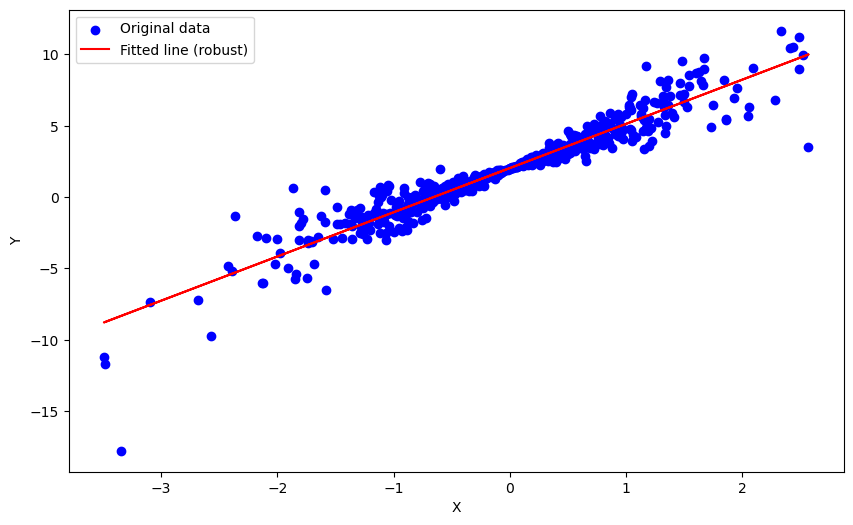

In [147]:

# Predict values
Y_pred_robust = robust_results.predict(X)

# Create a new figure
plt.figure(figsize=(10,6))

# Plot the original data points
plt.scatter(X[:, 1], Y, color='blue', label='Original data')  # Assume X is a 2D array and X[:, 1] is the explanatory variable

# Plot the fitted line with robust standard errors
plt.plot(X[:, 1], Y_pred_robust, color='red', label='Fitted line (robust)')


# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

## Lab Problem 3: MLE for the Binomial Logistic Regression Model

### This problem will help you understand the MLE method applied to a logistic regression model.

### 1. Generate a binary response variable Y with 500 observations, where the probability of success is determined by a logistic function of a standard normally distributed variable X. Specifically, Y = I(0.5 + 3X − ε > 0), where I(·) is an indicator function, and ε is logisticdistributed.

In [148]:
from scipy.stats import logistic

In [149]:
# X
#np.random.seed(0)
# mean
mu = 0
# std    
sigma = 1 
# number of observations
obs = 500

# Generate normal distirbution sample
X = np.random.normal(loc=mu, scale=sigma, size=obs)

# epsilon 
epsilon = logistic.rvs(size = obs)

# Y

Y = ((0.5 + 3*X - epsilon) > 0).astype(int)

### 2.Estimate the parameters of the logistic regression model using MLE.

In [150]:
# MLE Estimation
X = sm.add_constant(X)
results = sm.Logit(Y,X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.347429
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.4938
Time:                        00:26:22   Log-Likelihood:                -173.71
converged:                       True   LL-Null:                       -343.20
Covariance Type:            nonrobust   LLR p-value:                 1.067e-75
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4060      0.137      2.962      0.003       0.137       0.675
x1             3.0508      0.

### 4.Predict the response for a new set of X values and calculate the accuracy of the model.

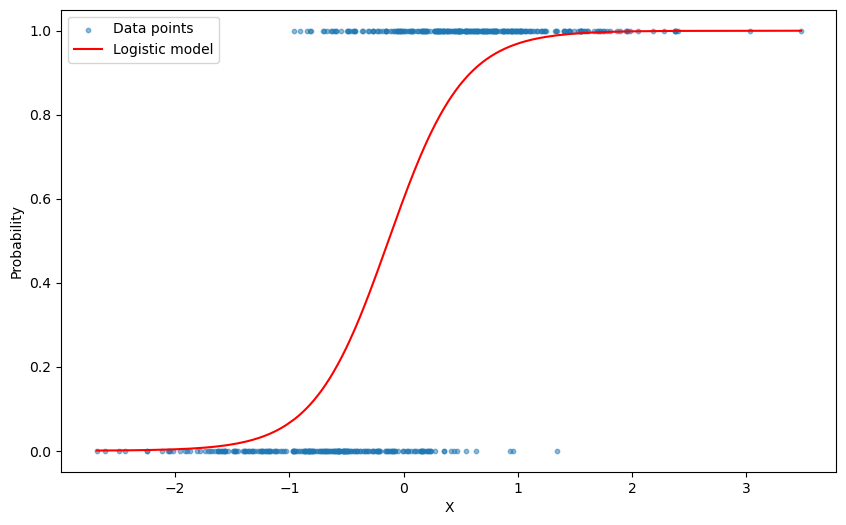

In [151]:
pred_prob = results.predict(X)

# Sort values for plotting
sort_idx = np.argsort(X[:,1])
x_sorted = X[sort_idx,1]
y_sorted = pred_prob[sort_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:,1], Y, alpha=0.5, s=10, label='Data points')
plt.plot(x_sorted, y_sorted, color='red', label='Logistic model')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Lab Problem 4: OLS vs MLE
### This problem will provide a comparison of OLS and MLE for linear regression models.

In [152]:
import statsmodels.api as sm
from scipy.optimize import minimize
from scipy import stats 

 ### 1. Generate a standard normal independent variable X and an error term ε which follows a normal distribution.

In [153]:
# X
np.random.seed(0)
# mean
mu = 0
# std    
sigma = 1 
# number of observations
obs = 500

# Generate normal distirbution sample
X = np.random.normal(loc=mu, scale=sigma, size=obs)

# Epsilon
#np.random.seed(100)
# mean
mu = 0
# std    
sigma = 1 
# Generate normal distirbution sample
obs = 500
epsilon = np.random.normal(loc=mu, scale=sigma, size=obs)

### 2. Construct the dependent variable Y using the formula Y = 2 + 3X + ε.

In [154]:
Y = 2 + 3 * X + epsilon

In [155]:

# Define log-likelihood function
def log_likelihood_function(beta, y, x):
    error = y - np.dot(x, beta)
    Log_likelihood = np.sum(stats.norm.logpdf(error, loc=0, scale=1))
    return - Log_likelihood

# Initial guess for beta
beta_init = [0, 0]
# Add constant to X for the intercept term
X = sm.add_constant(X)
# Minimize the negative log-likelihood
result_mle = minimize(log_likelihood_function, beta_init, args=(Y,X) )
print('\nMLE results:')
print('Coefficient estimates: ', result_mle.x)
# In MLE, standard error can be computed from the inverse of the Hessian matrix
print('Standard errors:', np.sqrt(np.diag(result_mle.hess_inv)))


MLE results:
Coefficient estimates:  [1.93383025 2.96013459]
Standard errors: [0.04473578 0.04480394]


### 4. Compare the estimated parameters and their standard errors obtained by OLS and MLE.

In [156]:
# OLS estimation
model_ols = sm.OLS(Y, X)
results_ols = model_ols.fit()
print('\nOLS results:')
print('Coefficient estimates:{}'.format(results_ols.params))
print('Standard errors::{}'.format(results_ols.bse))


OLS results:
Coefficient estimates:[1.93383026 2.96013459]
Standard errors::[0.04368538 0.04375193]


 ### 5. Simulate different scenarios by changing the sample size (n = 1000, n = 2000, n = 10000) and observe the consistency of both methods.

In [157]:
# number of observations
obs = 1000

In [158]:
# X
np.random.seed(0)
# mean
mu = 0
# std    
sigma = 1 


# Generate normal distirbution sample
X = np.random.normal(loc=mu, scale=sigma, size=obs)

# Epsilon
#np.random.seed(100)
# mean
mu = 0
# std    
sigma = 1 
# Generate normal distirbution sample
epsilon = np.random.normal(loc=mu, scale=sigma, size=obs)

Y = 2 + 3 * X + epsilon

# Initial guess for beta
beta_init = [0, 0]
# Add constant to X for the intercept term
X = sm.add_constant(X)
# Minimize the negative log-likelihood
result_mle = minimize(log_likelihood_function, beta_init, args=(Y,X) )
print('\nMLE results:')
print('Coefficient estimates: ', result_mle.x)
# In MLE, standard error can be computed from the inverse of the Hessian matrix
print('Standard errors:', np.sqrt(np.diag(result_mle.hess_inv)))

# OLS estimation
model_ols = sm.OLS(Y, X)
results_ols = model_ols.fit()
print('\nOLS results:')
print('Coefficient estimates:{}'.format(results_ols.params))
print('Standard errors::{}'.format(results_ols.bse))


MLE results:
Coefficient estimates:  [2.01221824 2.9690942 ]
Standard errors: [0.03221847 0.03037063]

OLS results:
Coefficient estimates:[2.01221825 2.9690942 ]
Standard errors::[0.03066353 0.03103376]


In [159]:
# number of observations
obs = 2000

In [160]:
# X
np.random.seed(0)
# mean
mu = 0
# std    
sigma = 1 


# Generate normal distirbution sample
X = np.random.normal(loc=mu, scale=sigma, size=obs)

# Epsilon
#np.random.seed(100)
# mean
mu = 0
# std    
sigma = 1 
# Generate normal distirbution sample
epsilon = np.random.normal(loc=mu, scale=sigma, size=obs)

Y = 2 + 3 * X + epsilon

# Initial guess for beta
beta_init = [0, 0]
# Add constant to X for the intercept term
X = sm.add_constant(X)
# Minimize the negative log-likelihood
result_mle = minimize(log_likelihood_function, beta_init, args=(Y,X) )
print('\nMLE results:')
print('Coefficient estimates: ', result_mle.x)
# In MLE, standard error can be computed from the inverse of the Hessian matrix
print('Standard errors:', np.sqrt(np.diag(result_mle.hess_inv)))

# OLS estimation
model_ols = sm.OLS(Y, X)
results_ols = model_ols.fit()
print('\nOLS results:')
print('Coefficient estimates:{}'.format(results_ols.params))
print('Standard errors::{}'.format(results_ols.bse))


MLE results:
Coefficient estimates:  [1.96477039 2.99089651]
Standard errors: [0.02369821 0.02298836]

OLS results:
Coefficient estimates:[1.9647704  2.99089651]
Standard errors::[0.02205125 0.02254238]


In [161]:
# number of observations
obs = 10000


In [162]:
# X
np.random.seed(0)
# mean
mu = 0
# std    
sigma = 1 


# Generate normal distirbution sample
X = np.random.normal(loc=mu, scale=sigma, size=obs)

# Epsilon
#np.random.seed(100)
# mean
mu = 0
# std    
sigma = 1 
# Generate normal distirbution sample
epsilon = np.random.normal(loc=mu, scale=sigma, size=obs)

Y = 2 + 3 * X + epsilon

# Initial guess for beta
beta_init = [0, 0]
# Add constant to X for the intercept term
X = sm.add_constant(X)
# Minimize the negative log-likelihood
result_mle = minimize(log_likelihood_function, beta_init, args=(Y,X) )
print('\nMLE results:')
print('Coefficient estimates: ', result_mle.x)
# In MLE, standard error can be computed from the inverse of the Hessian matrix
print('Standard errors:', np.sqrt(np.diag(result_mle.hess_inv)))

# OLS estimation
model_ols = sm.OLS(Y, X)
results_ols = model_ols.fit()
print('\nOLS results:')
print('Coefficient estimates:{}'.format(results_ols.params))
print('Standard errors::{}'.format(results_ols.bse))


MLE results:
Coefficient estimates:  [2.01084417 2.99219752]
Standard errors: [0.01024628 0.01024664]

OLS results:
Coefficient estimates:[2.01084418 2.99219752]
Standard errors::[0.00993297 0.01005638]
